# Running FLiES for an ECOSTRESS Scene

This is an example of running the artificial neural network emulator of the Forest Light Environmental Simulator (FLiES) corresponding to an ECOsystem Spaceborne Thermal Radiometer Experiment on Space Station (ECOSTRESS) scene.

In [1]:
from os.path import join
from datetime import datetime, date, time
from dateutil import parser
import rasters as rt
from GEOS5FP import GEOS5FP
from koppengeiger import load_koppen_geiger
from solar_apparent_time import UTC_to_solar
import sun_angles
from FLiESANN import FLiESANN
from matplotlib.colors import LinearSegmentedColormap
import logging
logging.disable(logging.CRITICAL)

[2025-04-01 16:33:08 INFO] checking URL: https://e4ftl01.cr.usgs.gov
[2025-04-01 16:33:08 INFO] remote verified with status 200 in 0.39 seconds: https://e4ftl01.cr.usgs.gov
[2025-04-01 16:33:08 INFO] SRTM working directory: /Users/gregoryhalverson/data/NASADEM
[2025-04-01 16:33:08 INFO] SRTM download directory: /Users/gregoryhalverson/data/NASADEM


Here's an example ECOSTRESS albedo scene.

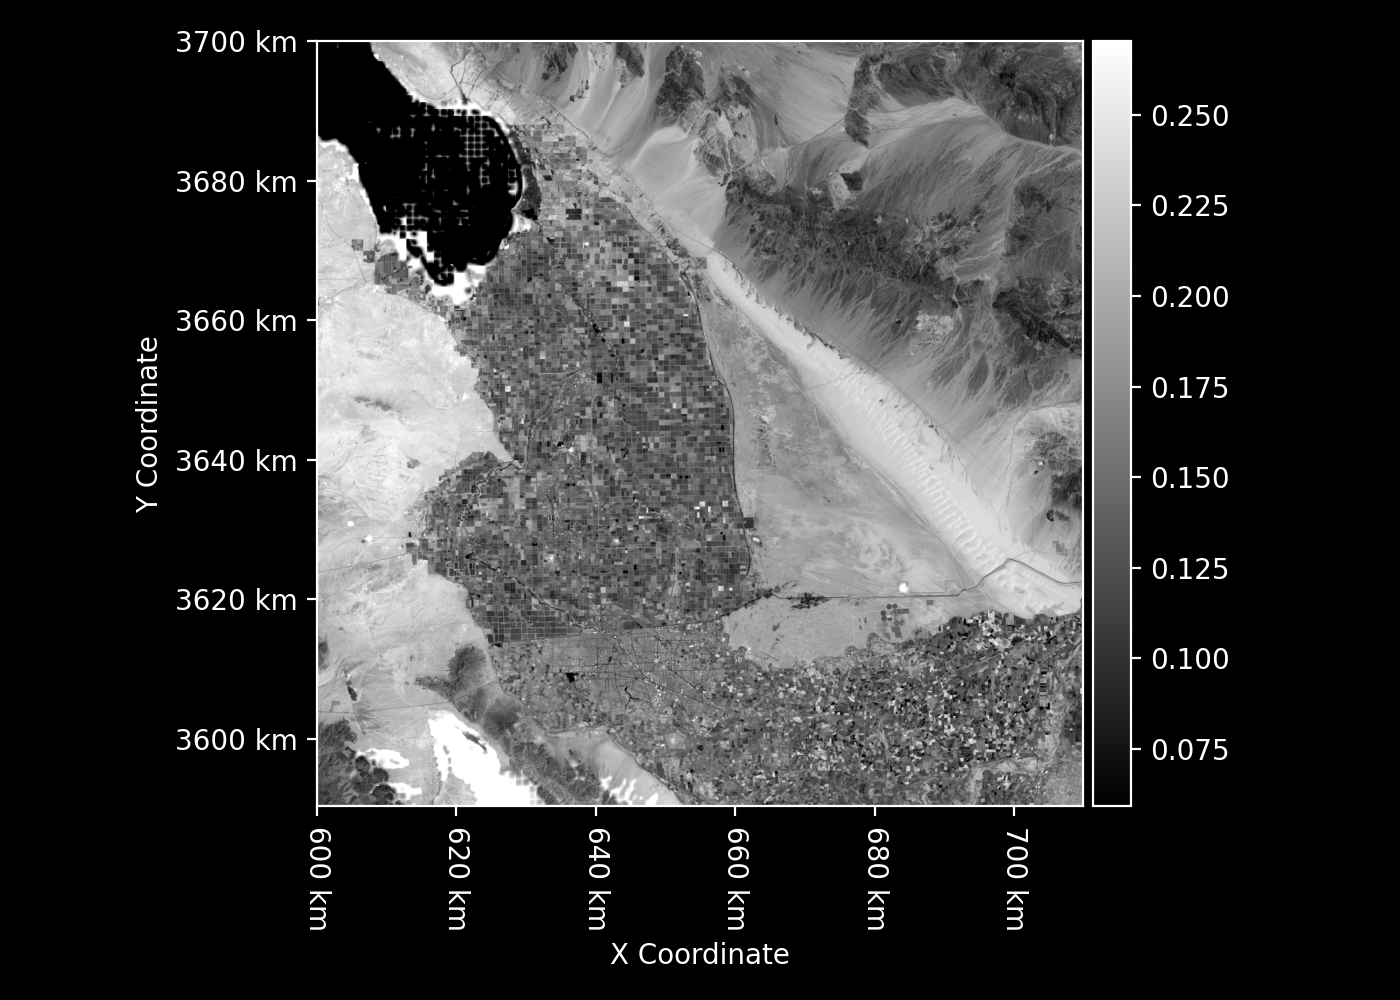

In [2]:
albedo_filename = "ECOv002_L2T_STARS_11SPS_20240728_0712_01_albedo.tif"
albedo_cmap = LinearSegmentedColormap.from_list(name="albedo", colors=["black", "white"])
albedo = rt.Raster.open(albedo_filename, cmap=albedo_cmap)
albedo

Let's get the acquisition time of the scene.

In [3]:
time_UTC = parser.parse(albedo_filename.split("_")[6])
longitude = albedo.geometry.centroid_latlon.x
latitude = albedo.geometry.centroid_latlon.y
time_solar = UTC_to_solar(time_UTC, longitude)
doy_solar = time_solar.timetuple().tm_yday
hour_of_day_solar = time_solar.hour + time_solar.minute / 60 + time_solar.second / 3600
print(f"{time_UTC:%Y-%m-%d %H:%M:%S} UTC")
print(f"{time_solar:%Y-%m-%d %H:%M:%S} solar apparent time at longitude {longitude}")
print(f"day of year {doy_solar} at longitude {longitude}")
print(f"hour of day {hour_of_day_solar} at longitude {longitude}")


2025-04-01 00:00:00 UTC
2025-03-31 16:18:37 solar apparent time at longitude -115.3433725031462
day of year 90 at longitude -115.3433725031462
hour of day 16.310277777777777 at longitude -115.3433725031462


In [4]:
geometry = albedo.geometry
geometry

{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [5]:
FLiES_results = FLiESANN(
    geometry=geometry,
    time_UTC=time_UTC,
    albedo=albedo
)

--2025-04-01 16:33:11--  https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2025/M03/D31/GEOS.fp.asm.tavg1_2d_rad_Nx.20250331_2330.V01.nc4
Resolving portal.nccs.nasa.gov (portal.nccs.nasa.gov)... 2001:4d0:2418:2800::a99a:9791, 169.154.151.145
Connecting to portal.nccs.nasa.gov (portal.nccs.nasa.gov)|2001:4d0:2418:2800::a99a:9791|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39814534 (38M) [application/octet-stream]
Saving to: ‘/Users/gregoryhalverson/data/GEOS5FP/2025.03.31/GEOS.fp.asm.tavg1_2d_rad_Nx.20250331_2330.V01.nc4.20250401233311.download’

     0K .......... .......... .......... .......... ..........  0%  263K 2m28s
    50K .......... .......... .......... .......... ..........  0%  611K 1m45s
   100K .......... .......... .......... .......... ..........  0% 2.45M 75s
   150K .......... .......... .......... .......... ..........  0% 32.2M 57s
   200K .......... .......... .......... .......... ..........  0%  661K 57s
   250K .......... ...

76832/76832 [==============================] - 19s 242us/step


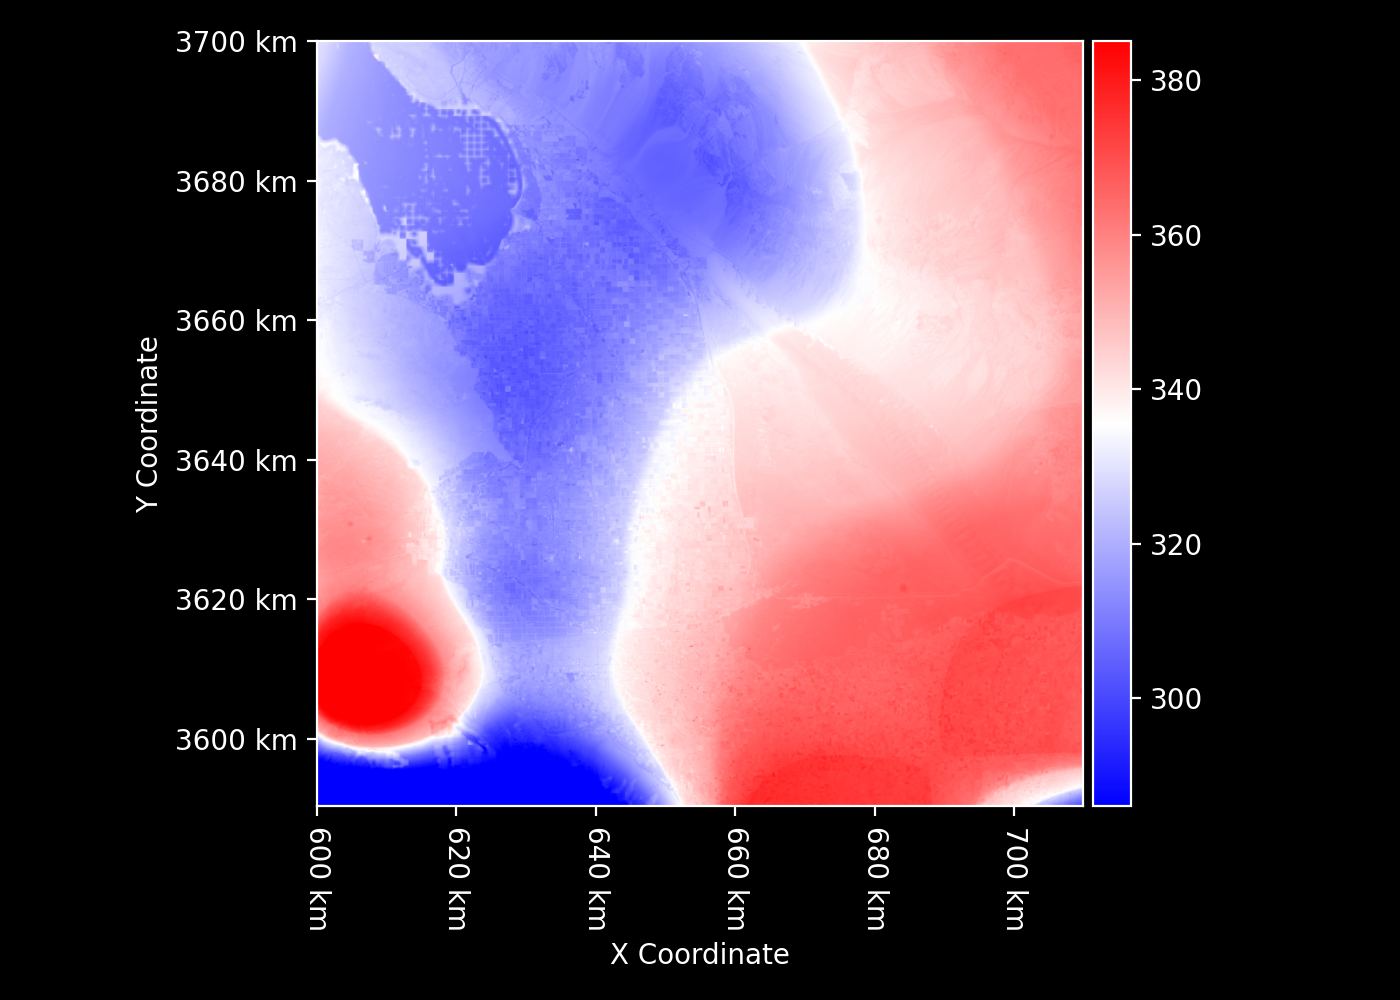

In [6]:
Rg = FLiES_results["Rg"]
Rg.cmap = "bwr"
Rg